In [ ]:
#| hide
from fastai.vision.all import *

# CNN basics

## Why ANNs Struggle with Images

1. **Lack of Spatial Awareness:** Traditional artificial neural networks (ANNs) fail to capture the relationships between nearby pixels, making it challenging to localize objects within an image accurately.
2. **Sequential Processing:** ANNs process images pixel by pixel, which can lead to difficulties in understanding the overall essence of the image, especially if the image is geometrically transformed or if the pixel density varies.

The new architect should share the weights for all the pixels of the image and that need to be transmitted independently to further layer.
And be invariant to transformation. The operation should be commutative, $F$:convolution and $f$:geomertic operation then $F(f(x)) = f(F(x))$.

In walks the **Convolution**. It uses a lot of *kernels* which loopover all the pixel of image and do element-wise summarization.

In [ ]:
#| hide
!wget -q --output-document=./data/lotus.jpg https://upload.wikimedia.org/wikipedia/commons/6/62/Lotus_free.jpg

In [ ]:
#| hide
!file ./data/lotus.jpg

./data/lotus.jpg: JPEG image data, JFIF standard 1.02, resolution (DPI), density 72x72, segment length 16, Exif Standard: [TIFF image data, big-endian, direntries=9, manufacturer=Canon, model=Canon EOS 650D, orientation=upper-left, xresolution=144, yresolution=152, resolutionunit=2, datetime=2014:04:23 12:34:17], baseline, precision 8, 457x363, components 3


In [ ]:
#| hide
Path().cwd(), Path().ls()

(Path('/home/sagar/git/sagaTrip/nbs'),
 (#8) [Path('data'),Path('.ipynb_checkpoints'),Path('nbdev.yml'),Path('index.ipynb'),Path('styles.css'),Path('sidebar.yml'),Path('_quarto.yml'),Path('01_cnn_basics.ipynb')])

In [ ]:
#| hide
path = Path('data/lotus.jpg')
path.is_file()

True

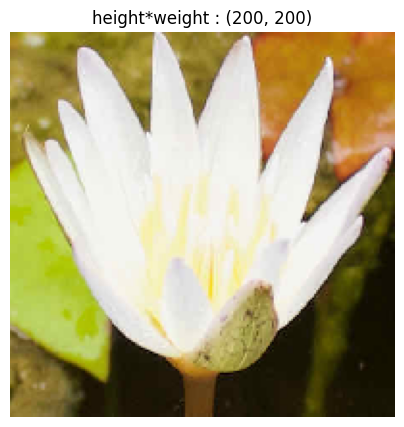

In [ ]:
im = Image.open(path).reshape(200,200)

show_image(im, title=f'height*weight : {im.shape}');

In [ ]:
im_t = tensor(im)
im_t.shape, im_t.dtype

(torch.Size([200, 200, 3]), torch.uint8)

In [ ]:
def apply_kernel(row, col, kernel):
    return (im_t[row-1:row+2, col-1:col+2] * kernel).sum()
def traverse(kernel, stride=1):
    rng = range(1, 199, stride)
    return tensor([[apply_kernel(i, j, kernel) for j in rng] for i in rng])

In [ ]:

top_edge = tensor([[-1, -1, -1],
                   [0, 0, 0],
                   [1, 1, 1]])

buttom_edge = tensor([[1, 1, 1],
                      [0, 0, 0],
                      [-1, -1, -1]])

avg = tensor([[1/9, 1/9, 1/9],
            [1/9, 1/9, 1/9],
            [1/9, 1/9, 1/9]])

In [ ]:
top_im = traverse(top_edge)
buttom_im = traverse(buttom_edge)
avg_im = traverse(avg)

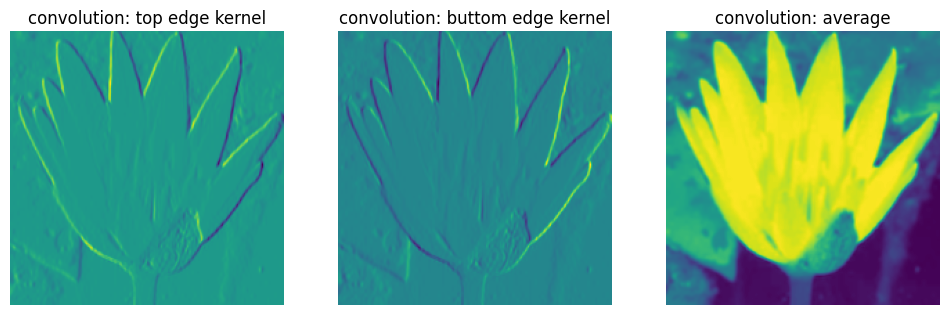

In [ ]:
show_images((top_im, buttom_im, avg_im), titles=("convolution: top edge kernel", "convolution: buttom edge kernel", "convolution: average"), imsize=4, );

Convolution has several important properties that are crucial for its effectiveness in image processing and deep learning:

1. **Kernel Size:** The size of the convolution kernel is region that is considered during the convolution operation. It is typically specified as a square matrix with odd width and height (e.g., 3x3, 5x5) to ensure symmetry around the central element.

  Kernel for average/blurr kernel :
  $$\begin{bmatrix}
  \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
  \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
  \frac{1}{9} & \frac{1}{9} & \frac{1}{9} \\
  \end{bmatrix}
  $$

2. **Padding:** Padding involves adding dummy pixels (usually zeros) around the borders of the input image. This is done to maintain the spatial dimensions of the output feature maps after convolution. The amount of padding is often determined by the kernel size, with a common choice being $\lfloor \frac{kernel\ size}{2} \rfloor$ pixels on each side.


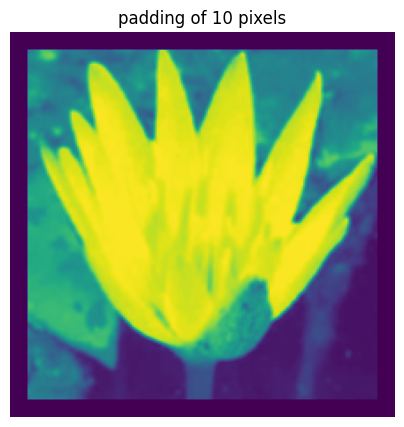

In [ ]:
padded_tensor = F.pad(avg_im, (10, 10, 10, 10))

show_image(padded_tensor, title="padding of 10 pixels");

3. Stride: Stride refers to the step size or jump between consecutive applications of the convolution kernel.
A stride of 1 means the kernel moves one pixel at a time, while a larger stride reduces the spatial dimensions of the output feature maps.
Stride 2 is is used for reducing the image dimenetion by factor 4.Usually the no of features doubles with the stride 2 as we are reducing dimention of the input.

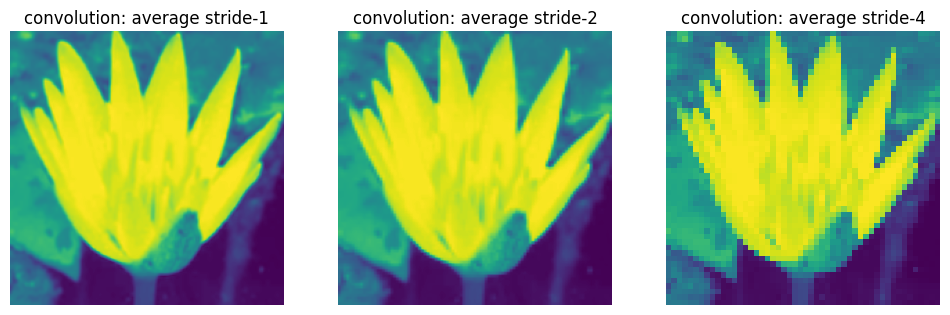

In [ ]:
avg_im_s2 = traverse(avg, 2)
avg_im_s4 = traverse(avg, 4)

show_images(( avg_im, avg_im_s2, avg_im_s4), titles=("convolution: average stride-1", "convolution: average stride-2", "convolution: average stride-4"), imsize=4, );


4. **Dilation** : involves inserting gaps or holes between the elements of the convolution kernel. This effectively increases the kernel size without changing the number of parameters, allowing the kernel to capture a larger receptive field. It help us to capture the far away pixels.<br>
  Unit kernel with 1-dilation :
  $\begin{bmatrix}
  1 & 0 & 1 \\
  0 & 0 & 0 \\
  1 & 0 & 1 \\
  \end{bmatrix}$



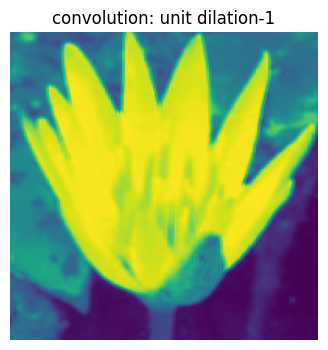

In [ ]:
dial = tensor([[1, 0, 1],
               [0, 0, 0],
               [1, 0, 1]])
dial_1 = traverse(dial)
show_images(( dial_1, ), titles=("convolution: unit dilation-1",), imsize=4, );